## Проверка простых гипотез

In [6]:
from scipy.stats import pointbiserialr
import pandas as pd
from utils.preformatting_data import *
from utils.graphics import *

data = preformat(pd.read_csv('../medics_1.csv', delimiter=',', encoding='utf-8'))

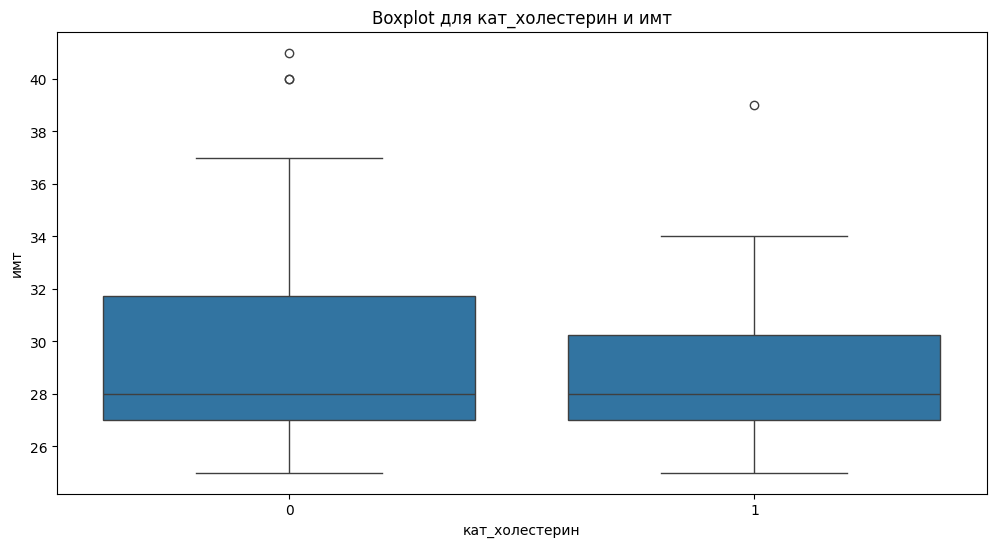

кат_холестерин
0    77.46
1    22.54
Name: proportion, dtype: float64


In [7]:
# переводим данные в числа для удобства работы
data['имт'] = pd.to_numeric(data['имт'], errors='coerce')

# создаем категориальный столбец для удобства работы и подсчета
data['кат_холестерин'] = (data['холестерин']
                          .apply(lambda x: 1 if x >= 6 else 0))

# находим данные для имт выше нормы
data_with_excess_bmi = data.loc[data['имт'] >= 25]

# выявляем зависимость имт и повышенного уровня холестерина
data_grouped = round(data_with_excess_bmi['кат_холестерин'].value_counts(normalize=True).mul(100), 2)

# для полного понимания строим ящик с усами, смотрим на зависимость
viz_data_box(data_with_excess_bmi, 'кат_холестерин', 'имт')
print(data_grouped)

In [8]:
# посмотрим на взаимосвязь используя аналитические методы:
correlation_coefficient, p_value = pointbiserialr(data_with_excess_bmi['кат_холестерин'], data_with_excess_bmi['имт'])

print(f"Point-Biserial Correlation Coefficient: {round(correlation_coefficient, 4)}")
print(f"P-value: {round(p_value, 4)}")

Point-Biserial Correlation Coefficient: -0.0573
P-value: 0.4984


In [9]:
result = correlation_ratio(data_with_excess_bmi['кат_холестерин'], data_with_excess_bmi['имт'])
print(f"Correlation using ETA: {round(result, 4)}")

Correlation using ETA: 0.0573


Ответ: Нет, связь между уровнем холестерина и имт выше нормы не доказана